# Laboratorio 2
Andrea Cecilia Rivas Castañeda - 16001120

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
from sklearn.impute import KNNImputer, SimpleImputer

# Cargamos el Dataset

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

### Eliminar la columna PassengerId

In [4]:
data.drop('PassengerId', axis = 1, inplace=True)

In [5]:
data.shape

(891, 11)

# Análisis de Datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


* Se observan 6 variables numericas
* Se observan 5 variables categoricas

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Análisis de datos faltantes

In [8]:
data.isnull().mean().sort_values(ascending=False)

Cabin       0.771044
Age         0.198653
Embarked    0.002245
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
dtype: float64

In [9]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum()>0)]
var_with_na

['Age', 'Cabin', 'Embarked']

In [10]:
data[var_with_na].dtypes

Age         float64
Cabin        object
Embarked     object
dtype: object

In [11]:
data.groupby('Survived').count().rsub(data.groupby('Survived').size(), axis=0)[var_with_na]

,Age,Cabin,Embarked
Survived,,,
0,125,481,0
1,52,206,2


* Age: de los 177 missing values, 125 no sobrevivieron y 52 si.
* Cabin: de los 687 missing values, 481 no sobrevivieron y 206 si.
* Embarked: de lo 2 missing values, 2 sobrevivieron.

### Variable Age

In [12]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
data[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


In [14]:
df = data.copy()
var = 'Age'
df['AgeNa'] = np.where(df[var].isnull(), 'Si', 'No')
temp = df.groupby('AgeNa').Survived.agg(['mean', 'std', 'count'])
temp

,mean,std,count
AgeNa,,,
No,0.406162,0.491460,714
Si,0.293785,0.456787,177


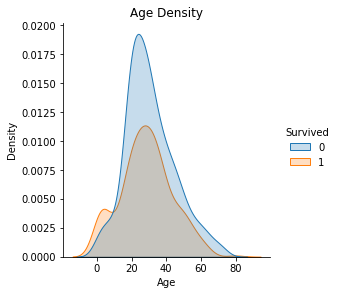

In [15]:
sns.displot(data=df, x="Age", hue="Survived", kind="kde", fill=True, height=4)
plt.title('Age Density')
plt.show()

#### Sustitución con Media

In [16]:
df.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [17]:
values = df['Survived'].eq(0).map({False: 28, True: 31})
df['Age_mean'] = df['Age'].fillna(values)

In [18]:
df.groupby('Survived').median()['Age']

Survived
0    28.0
1    28.0
Name: Age, dtype: float64

#### Sustitución por Mediana

In [19]:
df['Age_median'] = df['Age'].fillna(28)

#### Sustitución por Moda

In [20]:
statistics.mode(df.Age)

24.0

In [21]:
df['Age_mode'] = df['Age'].fillna(24)

#### Sustitución por 0

In [22]:
df['Age_0'] = df['Age'].fillna(0)

#### Sustitución por 110

In [23]:
df['Age_110'] = df['Age'].fillna(100)

#### Sustitución por Valores Random

In [24]:
df['Age_random'] = df['Age'].fillna(random.randint(16,50))

#### Sustitución por KNN

In [25]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_Imp = imputer.fit_transform(np.array(df.Age).reshape(-1, 1))
df['Age_KNN'] = knn_Imp

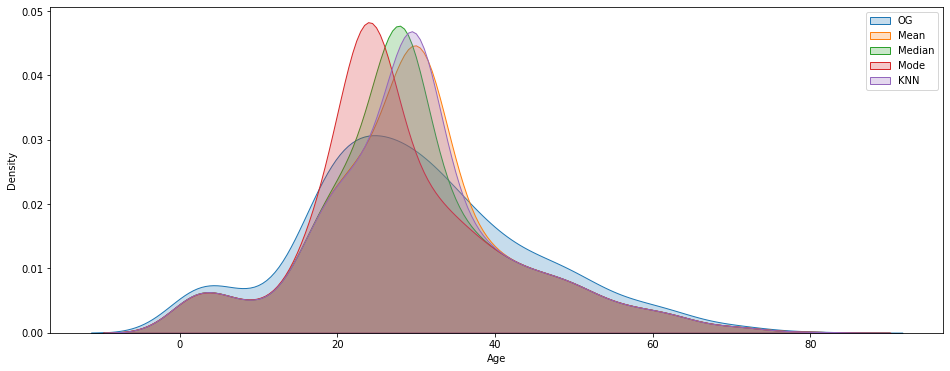

In [26]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
sns.set_palette("Set2")
sns.kdeplot(df['Age'], shade=True, label='OG')
sns.kdeplot(df['Age_mean'], shade=True, label='Mean')
sns.kdeplot(df['Age_median'], shade=True, label='Median')
sns.kdeplot(df['Age_mode'], shade=True, label='Mode')
sns.kdeplot(df['Age_KNN'], shade=True, label='KNN')
plt.legend()
plt.show()

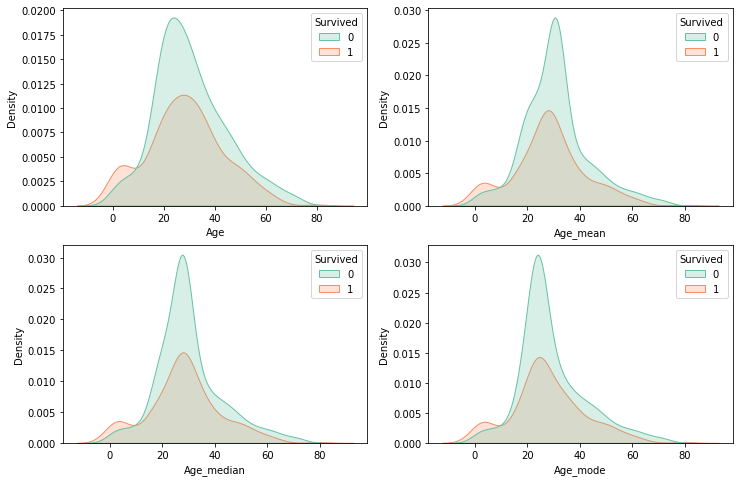

In [27]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.kdeplot(df['Age'], shade=True, hue=df.Survived, ax=ax1)
sns.kdeplot(df['Age_mean'], shade=True, hue=df.Survived, ax=ax2)
sns.kdeplot(df['Age_median'], shade=True, hue=df.Survived, ax=ax3)
sns.kdeplot(df['Age_mode'], shade=True, hue=df.Survived, ax=ax4)
#ax1.title.set_text('Age OG')
#ax2.title.set_text('Mean')
#ax3.title.set_text('Third Plot')
#ax4.title.set_text('Fourth Plot')
plt.show()

* Se seleccionó imputación por media.